In [34]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


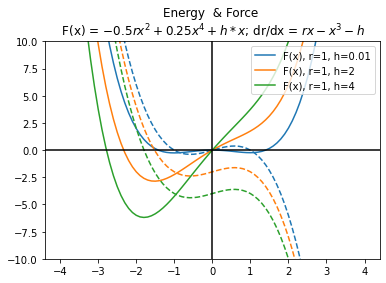

In [3]:
#this function will plot the energy and force
#it is very general since it uses a special python trick of taking arbitrary named arguments (**kwargs) 
#and passes them on to a specified input function
def plot_energy_force(function, xmin=-3,xmax=3,spacing=0.1,**kwargs):
    x_points = np.arange(xmin,xmax+spacing,spacing)
    energies, forces = function(x_points,**kwargs)
    label = 'F(x)'
    for arg in kwargs:
        label=label+', %s=%s'%(arg,str(kwargs[arg]))
    p = plt.plot(x_points,energies,label=label)
    plt.plot(x_points,forces,label='',color=p[0].get_color(),linestyle='--')
    plt.legend(loc='upper right')

    
#this function returns the energy and force on a particle from a double well
def double_well_energy_force(x,r,h):
    #calculate the energy on force 
    energy = -0.5*r*x**2 + 0.25*x**4 + h*x
    force = r*x - x**3 - h # vector field (pitchfork)
    return energy, force

plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=1, h=0.01)
plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=1, h=2)
plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=1, h=4)
axhline(0,linestyle='-',color='black')
axvline(0,linestyle='-',color='black')
ylim(-10,10)
plt.title('Energy  & Force \n F(x) = $-0.5rx^2 + 0.25x^4 + h*x$; dr/dx = $rx - x^3 - h$ ')
plt.show()



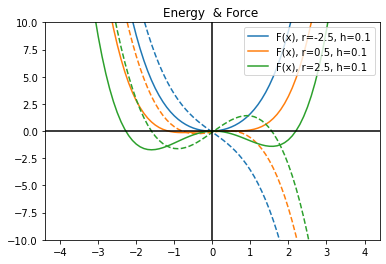

In [4]:
plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=-2.5, h=0.1)
plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=0.5, h=0.1)
plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=2.5, h=0.1)
axhline(0,linestyle='-',color='black')
axvline(0,linestyle='-',color='black')
ylim(-10,10)
plt.title('Energy  & Force ')
plt.show()

(-10.0, 10.0)

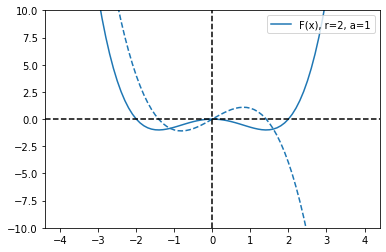

In [35]:
#simulate double well potential
#this function returns the energy and force on a particle from a double well
def double_well_energy_force(x, r,a):
    #calculate the energy on force on the right hand side of the equal signs
    energy =-0.5*r*x**2 + 0.25*a*x**4
    force = r*x - a*x**3
    return energy, force

plot_energy_force(double_well_energy_force, xmin=-4,xmax=+4, r=2, a =1)
axhline(0,linestyle='--',color='black')
axvline(0,linestyle='--',color='black')
ylim(-10,10)

In [32]:
#CODE velocity Verlet Algorithm

def position_update(x,v,F,dt):
    x_new = x + dt*v + 0.5*dt*dt*F
    return x_new

def velocity_update(v,F_new,F_old,dt):
    v_new = v + 0.5*dt*(F_old+F_new)
    return v_new

#this function will take the initial energy as an input and run velocity verlet dynamics
def velocity_verlet_harmonic_oscillator(potential, max_time, dt, initial_position, initial_velocity,
                                        save_frequency=3, **kwargs ):
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    positions = []
    velocities = []
    total_energies = []
    save_times = []
    
    while(t<max_time):
        potential_energy, force = potential(x,**kwargs)
        if step_number%save_frequency == 0:
            e_total = .5*v*v + potential_energy

            positions.append(x)
            velocities.append(v)
            total_energies.append(e_total)
            save_times.append(t)
        
        # update the positions
        x = position_update(x,v,force,dt)
        # recompute the energy and force
        potential_energy2, force2 = potential(x,**kwargs)
        # update the velocity
        v = velocity_update(v,force2,force,dt)
                
        t = t+dt
        step_number = step_number + 1
    
    return save_times, positions, velocities, total_energies
       

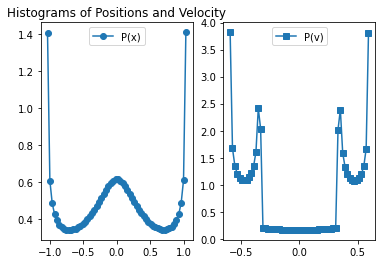

In [33]:
def bin_centers(bin_edges):
    return (bin_edges[1:]+bin_edges[:-1])/2.


initial_position = 1.05
initial_velocity = 0

#to get a good histogram, we need to run a lot longer than before
my_max_time = 1000

times, positions, velocities, total_energies = velocity_verlet_harmonic_oscillator(double_well_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             r=my_k, a=my_a)


dist_hist, dist_bin_edges = np.histogram(positions,bins=60,density=True)
vel_hist, vel_bin_edges = np.histogram(velocities,bins=60,density=True)
subplot(121)
plot(bin_centers(dist_bin_edges), dist_hist,marker='o',label='P(x)')
legend(loc='upper center')
plt.title('Histograms of Positions and Velocity')
subplot(122)
plot(bin_centers(vel_bin_edges), vel_hist,marker='s',label='P(v)')
legend(loc='upper center')

(-4.0, 4.0)

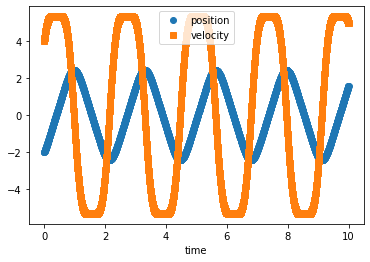

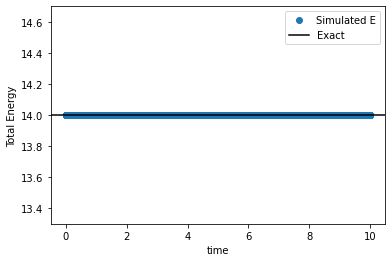

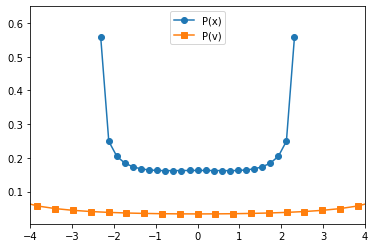

In [36]:
# Here the initial energy is 8 and the barrier height is 4, so it goes back and forth
my_k = 1
my_a = 2
my_initial_position = -2
my_initial_velocity = 4

my_dt = 0.001
my_max_time = 10

times, positions, velocities, total_energies = velocity_verlet_harmonic_oscillator(double_well_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            my_initial_position, my_initial_velocity,\
                                                                             r=my_k, a=my_a)

plt.plot(times,positions,marker='o',label='position',linestyle='')
plt.plot(times,velocities,marker='s',label='velocity',linestyle='')

xlabel('time')
legend(loc='upper center')

plt.figure()
initial_energy = total_energies[0]
plt.plot(times,total_energies,marker='o',linestyle='',label='Simulated E')
plt.axhline(initial_energy,color='black',label='Exact')
plt.ylim(0.95*initial_energy,1.05*initial_energy)
xlabel('time')
ylabel("Total Energy")
legend()

plt.figure()
#to get a good histogram, we need to run a lot longer than before
my_max_time = 1000

times, positions, velocities, total_energies = velocity_verlet_harmonic_oscillator(double_well_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            my_initial_position, my_initial_velocity,\
                                                                             r=my_k, a=my_a)


dist_hist, dist_bin_edges = np.histogram(positions,bins=25,density=True)
vel_hist, vel_bin_edges = np.histogram(velocities,bins=25,density=True)


plot(bin_centers(dist_bin_edges), dist_hist,marker='o',label='P(x)')
plot(bin_centers(vel_bin_edges), vel_hist,marker='s',label='P(v)')
legend(loc='upper center')
xlim(-4,4)

In [5]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [6]:

my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)